### Clean Tracts

_Merges Illinois census tracts (defined from the 2020 decennial census and updated in 2021) with cleaned demographic data from the 2021 American Community Survey. The output consists of three CSV files: `population_demographics.csv`, `education_demographics.csv`, and `income_demographics.csv`._

####  Setup

In [1]:
import geopandas as gpd
import pandas as pd

#### Load Illinois Census Tract Boundaries

In [2]:
# Load and preview census tracts for the state of Illinois
boundaries_dir = "../data/raw/boundaries"
il_tracts_gdf = gpd.read_file(f"{boundaries_dir}/illinois_census_tracts_2021.zip")
il_tracts_gdf.head(2)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,047,957100,17047957100,9571,Census Tract 9571,G5020,S,17502924,151254,+38.3810609,-088.0566832,"POLYGON ((-88.10244 38.39351, -88.10232 38.393..."
1,17,047,956900,17047956900,9569,Census Tract 9569,G5020,S,289722767,430838,+38.4939617,-088.0440563,"POLYGON ((-88.14857 38.46782, -88.14856 38.468..."


<Axes: >

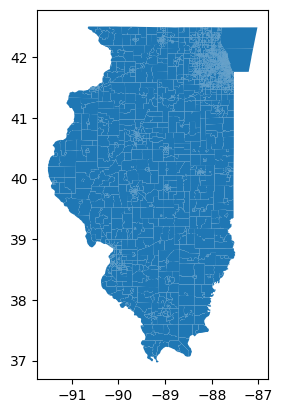

In [3]:
# Plot boundaries
il_tracts_gdf.plot()

#### Merge Demographic Data to Tracts

In [4]:
# Load demographic data for all census tracts in Cook County
# (exported from Social Explorer) and preview DataFrame
dems_df = pd.read_csv("../data/raw/demographics/illinois_demographics.csv")
dems_df = dems_df.iloc[1:, :]
dems_df.head(2)

,FIPS,Qualifying Name,File identification,State Postal Abbreviation,Summary Level,Geographic Component,Logical Record Number,US,Census Region,Census Division,...,Population 16 Years and Over: in Labor Force: in Armed Forces,Population 16 Years and Over: in Labor Force: Civilian,Population 16 Years and Over: in Labor Force: Civilian: Employed,Population 16 Years and Over: in Labor Force: Civilian: Unemployed,Population 16 Years and Over: Not in Labor Force,Median Household Income (In 2021 Inflation Adjusted Dollars),Per Capita Income (In 2021 Inflation Adjusted Dollars),Gini Index,Housing Units,Median Gross Rent
1,17001000100,"Census Tract 1, Adams County, Illinois",ACSSF,il,140,00,0005840,NaN,NaN,NaN,...,0,2363,2244,119,1512,56603,35745,0.4227,2414,901
2,17001000201,"Census Tract 2.01, Adams County, Illinois",ACSSF,il,140,00,0005841,NaN,NaN,NaN,...,0,1055,1032,23,560,44453,27131,0.3892,902,816


In [5]:
# Merge Illinois census tracts with demographic data and preview DataFrame
merged_df = il_tracts_gdf.merge(
    right=dems_df,
    how="left",
    left_on="GEOID",
    right_on="FIPS")
merged_df.head(2)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Population 16 Years and Over: in Labor Force: in Armed Forces,Population 16 Years and Over: in Labor Force: Civilian,Population 16 Years and Over: in Labor Force: Civilian: Employed,Population 16 Years and Over: in Labor Force: Civilian: Unemployed,Population 16 Years and Over: Not in Labor Force,Median Household Income (In 2021 Inflation Adjusted Dollars),Per Capita Income (In 2021 Inflation Adjusted Dollars),Gini Index,Housing Units,Median Gross Rent
0,17,047,957100,17047957100,9571,Census Tract 9571,G5020,S,17502924,151254,...,0,1049,910,139,658,49632,23767,0.371,951,700
1,17,047,956900,17047956900,9569,Census Tract 9569,G5020,S,289722767,430838,...,0,946,878,68,732,56490,28746,0.3561,1061,443


#### Clean Dataset Columns

In [6]:
# Remove unused columns
cols_to_remove = [
    "US",
    "County Subdivision (FIPS)",
    "Block Group",
    "Consolidated City",
    "American Indian Area/AlaskaNative Area/ Hawaiian Home Land(Census)",
    "American Indian Area/AlaskaNative Area/ Hawaiian Home Land(FIPS)",
    "American Indian Trust Land/Hawaiian Home Land Indicator",
    "American Indian TribalSubdivision (Census)",
    "American Indian TribalSubdivision (FIPS)",
    "Alaska Native RegionalCorporation (FIPS)",
    "Metropolitan and MicropolitanStatistical Area",
    "Combined Statistical Area",
    "Metropolitan Statistical Area-Metropolitan Division",
    "Metropolitan Area Central City",
    "Metropolitan/MicropolitanIndicator Flag",
    "New England City and Town Area",
    "New England City and TownCombined Statistical Area",
    "New England City and Town AreaDivision",
    "Urban Area",
    "Urban Area Central Place",
    "Current Congressional District ***",
    "State Legislative District Upper",
    "State Legislative District Lower",
    "Voting District",
    "ZIP Code Tabulation Area (3-digit)",
    "5-digit ZIP Code Tabulation Area",
    "Subminor Civil Division (FIPS)",
    "State-School District (Elementary)",
    "State-School District (Secondary)",
    "State-School District (Unified)",
    "Urban/Rural",
    "Principal City Indicator",
    "Traffic Analysis Zone",
    "Urban Growth Area",
    "Public Use Microdata Area – 5%File",
    "Public Use Microdata Area - 1% File",
    "Place (FIPS Code)",
    "Census Region",
    "Census Division",
    "State (Census Code)",
    "STATEFP",
    "COUNTYFP",
    "TRACTCE",
    "NAME",
    "NAMELSAD",
    "MTFCC",
    "FUNCSTAT",
    "FIPS",
    "File identification",
    "State Postal Abbreviation",
    "Summary Level",
    "Geographic Component",
    "Logical Record Number",
    "Census Region",
    "Census Division",
    "State (Census Code)",
    "State (FIPS Code)",
    "County of current residence",
    "Census Tract",
    "Geographic Identifier",
    "Area Name",
    "Tribal Tract",
    "Tribal Block Group",
    "Place (State FIPS + Place FIPS)",
    "Total Population.1",
    "INTPTLAT",
    "INTPTLON",
    "Total Population:"
]
merged_gdf = gpd.GeoDataFrame(merged_df.drop(columns=cols_to_remove))
merged_gdf.head(2)

,GEOID,ALAND,AWATER,geometry,Qualifying Name,Total Population,Population Density (Per Sq. Mile),Area (Land),Total Population: Male,Total Population: Female,...,Population 16 Years and Over: in Labor Force: in Armed Forces,Population 16 Years and Over: in Labor Force: Civilian,Population 16 Years and Over: in Labor Force: Civilian: Employed,Population 16 Years and Over: in Labor Force: Civilian: Unemployed,Population 16 Years and Over: Not in Labor Force,Median Household Income (In 2021 Inflation Adjusted Dollars),Per Capita Income (In 2021 Inflation Adjusted Dollars),Gini Index,Housing Units,Median Gross Rent
0,17047957100,17502924,151254,"POLYGON ((-88.10244 38.39351, -88.10232 38.393...","Census Tract 9571, Edwards County, Illinois",2171,321.2528,6.75791702509819,1026,1145,...,0,1049,910,139,658,49632,23767,0.371,951,700
1,17047956900,289722767,430838,"POLYGON ((-88.14857 38.46782, -88.14856 38.468...","Census Tract 9569, Edwards County, Illinois",2051,18.335,111.862584691512,1017,1034,...,0,946,878,68,732,56490,28746,0.3561,1061,443


In [7]:
# Clean tract boundary metadata columns and preview DataFrame
id_col_mapping = {
    "GEOID": "geoid",
    "Qualifying Name": "qualifying name",
    "ALAND": "current land area (sq. m)",
    "AWATER": "current water area (sq. m)"
}
merged_gdf = merged_gdf.rename(columns=id_col_mapping)
merged_gdf.head(2)

,geoid,current land area (sq. m),current water area (sq. m),geometry,qualifying name,Total Population,Population Density (Per Sq. Mile),Area (Land),Total Population: Male,Total Population: Female,...,Population 16 Years and Over: in Labor Force: in Armed Forces,Population 16 Years and Over: in Labor Force: Civilian,Population 16 Years and Over: in Labor Force: Civilian: Employed,Population 16 Years and Over: in Labor Force: Civilian: Unemployed,Population 16 Years and Over: Not in Labor Force,Median Household Income (In 2021 Inflation Adjusted Dollars),Per Capita Income (In 2021 Inflation Adjusted Dollars),Gini Index,Housing Units,Median Gross Rent
0,17047957100,17502924,151254,"POLYGON ((-88.10244 38.39351, -88.10232 38.393...","Census Tract 9571, Edwards County, Illinois",2171,321.2528,6.75791702509819,1026,1145,...,0,1049,910,139,658,49632,23767,0.371,951,700
1,17047956900,289722767,430838,"POLYGON ((-88.14857 38.46782, -88.14856 38.468...","Census Tract 9569, Edwards County, Illinois",2051,18.335,111.862584691512,1017,1034,...,0,946,878,68,732,56490,28746,0.3561,1061,443


#### Create Population Dataset

In [8]:
# Define population-related columns
population_cols = [
    "Total Population",
    "Population Density (Per Sq. Mile)",
    "Total Population: Male",
    "Total Population: Female",
    "Total Population: White Alone",
    "Total Population: Black or African American Alone",
    "Total Population: American Indian and Alaska Native Alone",
    "Total Population: Asian Alone",
    "Total Population: Native Hawaiian and Other Pacific Islander Alone",
    "Total Population: Some Other Race Alone",
    "Total Population: Two or More Races"
]

In [9]:
# Create population DataFrame and preview
subset_cols = list(id_col_mapping.values()) + population_cols + ["geometry"]
population_df = merged_gdf[subset_cols]
pop_col_map = {}
for col in population_cols:
    if "Population" not in col:
        pop_col_map[col] = col.replace("total", "total population").lower()
    else:
        pop_col_map[col] = col.lower()

population_df = population_df.rename(columns=pop_col_map)
population_df.head(2)

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),total population,population density (per sq. mile),total population: male,total population: female,total population: white alone,total population: black or african american alone,total population: american indian and alaska native alone,total population: asian alone,total population: native hawaiian and other pacific islander alone,total population: some other race alone,total population: two or more races,geometry
0,17047957100,"Census Tract 9571, Edwards County, Illinois",17502924,151254,2171,321.2528,1026,1145,2082,0,33,15,0,8,33,"POLYGON ((-88.10244 38.39351, -88.10232 38.393..."
1,17047956900,"Census Tract 9569, Edwards County, Illinois",289722767,430838,2051,18.335,1017,1034,2003,12,0,0,0,0,36,"POLYGON ((-88.14857 38.46782, -88.14856 38.468..."


In [10]:
# Write to file
clean_dir = "../data/clean"
population_df.to_csv(f"{clean_dir}/population_demographics.csv", index=False)

<Axes: >

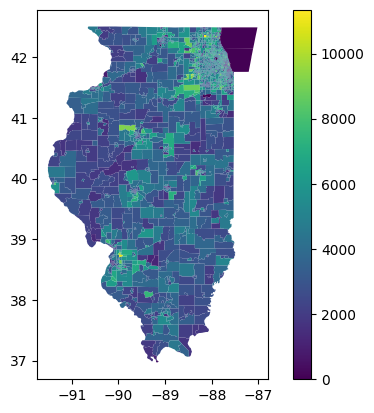

In [11]:
# Plot population variable as example
gdf = gpd.GeoDataFrame(population_df)
gdf["total population"] = gdf["total population"].astype('int64')
gdf.plot("total population", legend=True)

#### Create Education Dataset

In [12]:
# Define education columns
education_cols = [
    "Population 25 Years and Over:",
    "Population 25 Years and Over: Less than High School",
    "Population 25 Years and Over: High School Graduate or More (Includes Equivalency)",
    "Population 25 Years and Over: Some College or More",
    "Population 25 Years and Over: Bachelor's Degree or More",
    "Population 25 Years and Over: Master's Degree or More",
    "Population 25 Years and Over: Professional School Degree or More",
    "Population 25 Years and Over: Doctorate Degree"
]

In [13]:
# Subset DataFrame to education columns only
subset_cols = list(id_col_mapping.values()) + education_cols + ["geometry"]
education_df = merged_gdf[subset_cols]

# Create mapping for correct column format
edu_col_map = {}
for col in education_cols:
    edu_col_map[col] = col.lower().strip(":")

# Apply mapping
education_df = education_df.rename(columns=edu_col_map)

# Preview DataFrame
education_df.head(2)

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry
0,17047957100,"Census Tract 9571, Edwards County, Illinois",17502924,151254,1397,132,1265,725,198,51,10,10,"POLYGON ((-88.10244 38.39351, -88.10232 38.393..."
1,17047956900,"Census Tract 9569, Edwards County, Illinois",289722767,430838,1469,121,1348,889,172,56,17,15,"POLYGON ((-88.14857 38.46782, -88.14856 38.468..."


In [14]:
# Write to file
education_df.to_csv(f"{clean_dir}/education_demographics.csv", index=False)

<Axes: >

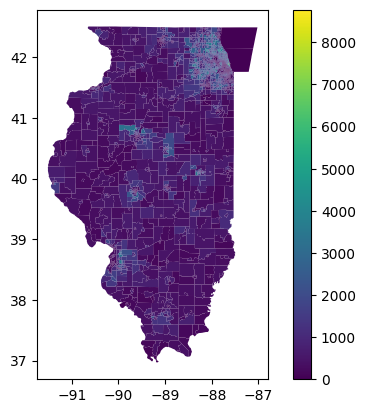

In [15]:
# Plot education variable as example
gdf = gpd.GeoDataFrame(education_df)
col_name = "population 25 years and over: bachelor's degree or more"
gdf[col_name] = gdf[col_name].astype('int64')
gdf.plot(col_name, legend=True)

#### Create Income Dataset

In [16]:
# Define income-related columns
income_cols = [
    "Gini Index",
    "Median Gross Rent"
]

In [17]:
# Subset DataFrame to income columns only
subset_cols = list(id_col_mapping.values()) + income_cols + ["geometry"]
income_df = merged_gdf[subset_cols]

# Create mapping for correct column format
income_col_map = {}
for col in income_cols:
    income_col_map[col] = ' '.join(col.lower().strip(":").split(' '))

# Update mapping to explicitly replace ambiguous columns
income_col_map["Households:.1"] = "total households reporting public assistance income status"
income_col_map["Households:"] = "total households reporting income"

# Apply mapping
income_df = income_df.rename(columns=income_col_map)

# Preview DataFrame
income_df.head(2)

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),gini index,median gross rent,geometry
0,17047957100,"Census Tract 9571, Edwards County, Illinois",17502924,151254,0.371,700,"POLYGON ((-88.10244 38.39351, -88.10232 38.393..."
1,17047956900,"Census Tract 9569, Edwards County, Illinois",289722767,430838,0.3561,443,"POLYGON ((-88.14857 38.46782, -88.14856 38.468..."


In [18]:
# Write to file
income_df.to_csv(f"{clean_dir}/income_demographics.csv", index=False)

<Axes: >

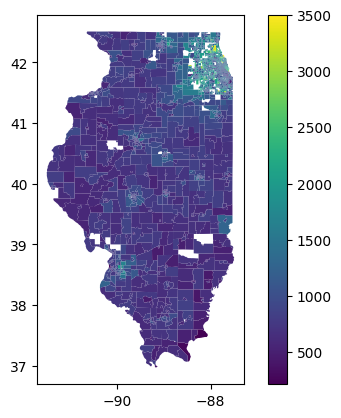

In [19]:
# Plot income variable as example
gdf = gpd.GeoDataFrame(income_df)
col_name = "median gross rent"
gdf[col_name] = gdf[col_name].astype(float)
gdf.plot(col_name, legend=True)